In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate

import cv2 
from PIL import Image
#from test_utils import summary, comparator (모듈을 import 할 수 없음)

In [4]:
import os
import numpy as np
import pandas as pd
import imageio

import matplotlib.pyplot as plt
%matplotlib inline

input_dir = './train/image/'
target_dir = './train/label/'

# sorted함수를 사용하여 정렬된 파일 리스트를 반환
# 이터러블 객체도 받을 수 있음 
image_list = sorted(
    [
     os.path.join(input_dir, fname)
     for fname in os.listdir(input_dir)
     if fname.endswith('.jpg')
    ])

mask_list = sorted(
    [
     os.path.join(target_dir, fname)
     for fname in os.listdir(target_dir)
     if fname.endswith('png') and not fname.startswith('.')
    ])
val_input_dir = './validation/image/'
val_target_dir = './validation/label/'

# sorted함수를 사용하여 정렬된 파일 리스트를 반환
# 이터러블 객체도 받을 수 있음 
val_image_list = sorted(
    [
     os.path.join(val_input_dir, fname)
     for fname in os.listdir(val_input_dir)
     if fname.endswith('.jpg')
    ]
)

val_mask_list = sorted(
    [
     os.path.join(val_target_dir, fname)
     for fname in os.listdir(val_target_dir)
     if fname.endswith('png') and not fname.startswith('.')
    ]
)


/var/folders/fb/fgwpc_kd3dxdcfsnm_9w3wv40000gn/T/ipykernel_50181/3309042893.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image_list[N])
/var/folders/fb/fgwpc_kd3dxdcfsnm_9w3wv40000gn/T/ipykernel_50181/3309042893.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(mask_list[N])


Text(0.5, 1.0, 'Segmentation')

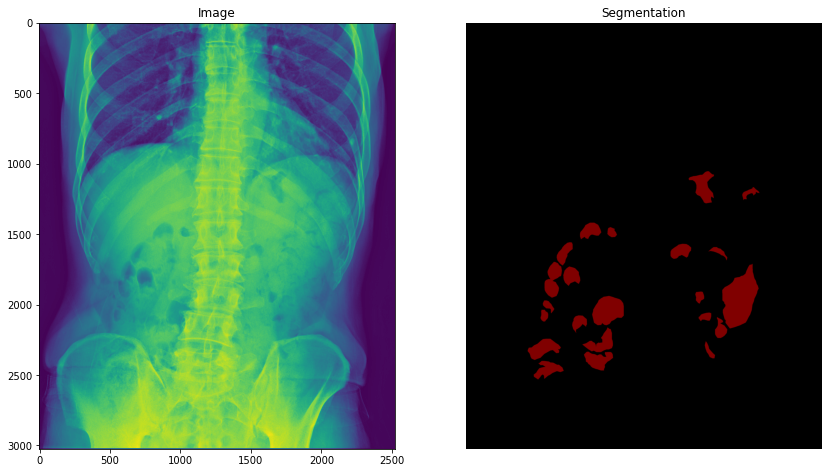

In [11]:
N = 7
img = imageio.imread(image_list[N])
mask = imageio.imread(mask_list[N])
#mask = np.array([max(mask[i, j]) for i in range(mask.shape[0])for j in range(mask.shape[1])]).reshape(img.shape[0], img.shape[1])

fig, arr = plt.subplots(1, 2, figsize=(14, 10))
plt.axis('off')
arr[0].imshow(img)
arr[0].set_title('Image')
arr[1].imshow(mask)
arr[1].set_title('Segmentation')